In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import os
directory = os.fsencode('eval_data')

full_samples = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("times"):
        full_samples.append(filename[6:-4])

In [7]:
avail_experiments = sorted(full_samples)
avail_experiments[:5]

['10d1p1o', '10d1p2o', '10d1p3o', '10d2p1o', '10d2p2o']

In [18]:
size = avail_experiments[50]

sample = pd.read_csv(f'eval_data/short_{size}.csv')
model = pd.read_csv(f'eval_data/times_{size}.csv')

In [19]:
model

,cum_time,res
0,0.864806,0.514286
1,1.704806,0.514286
2,2.145806,0.514286
3,2.145806,0.514286


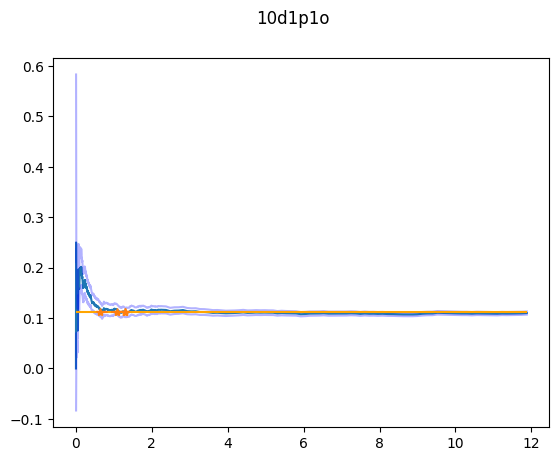

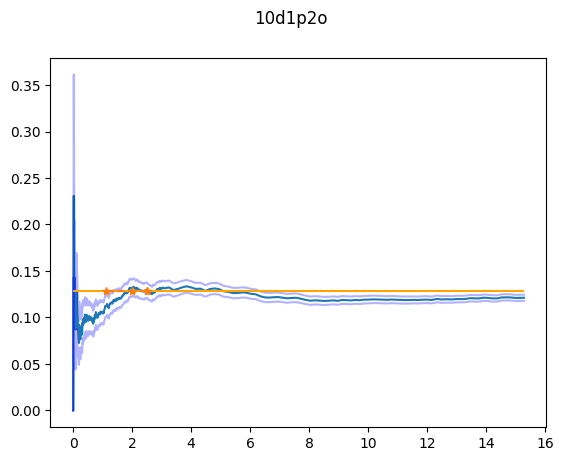

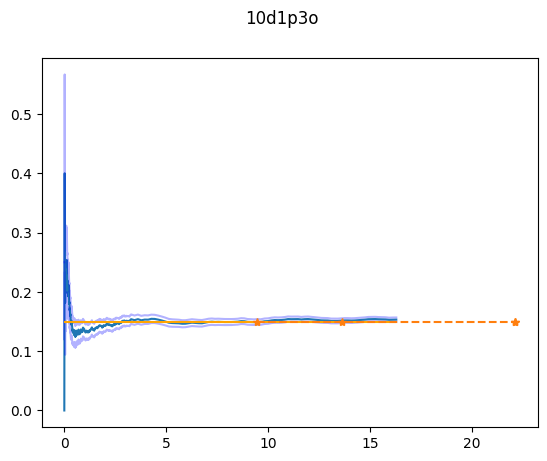

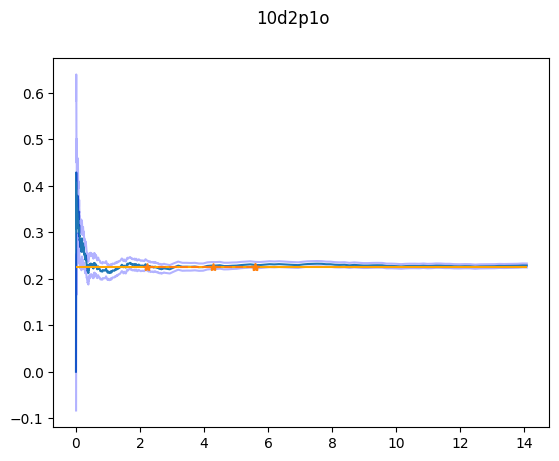

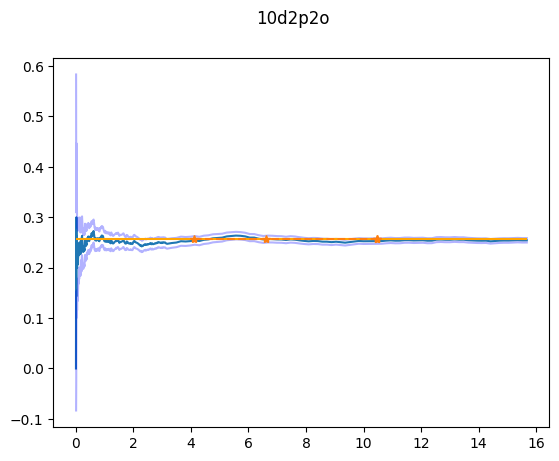

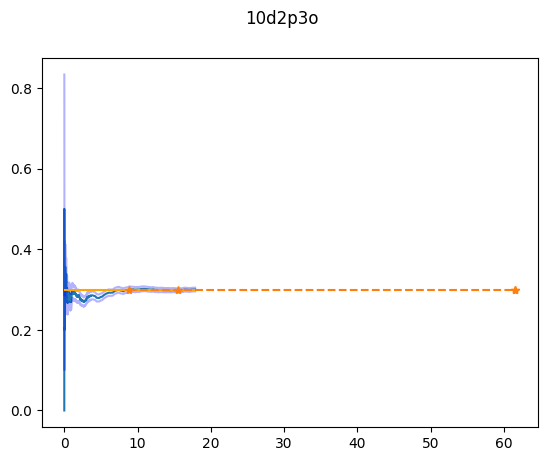

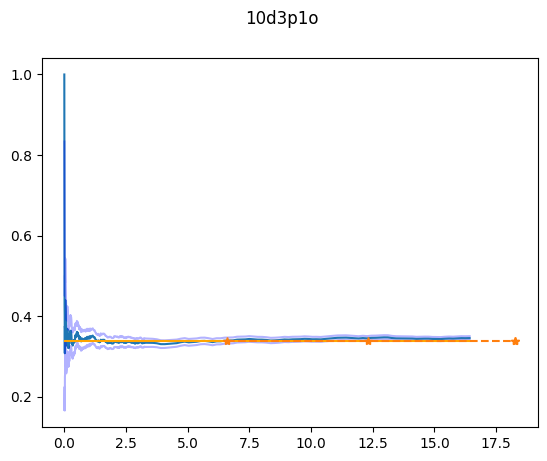

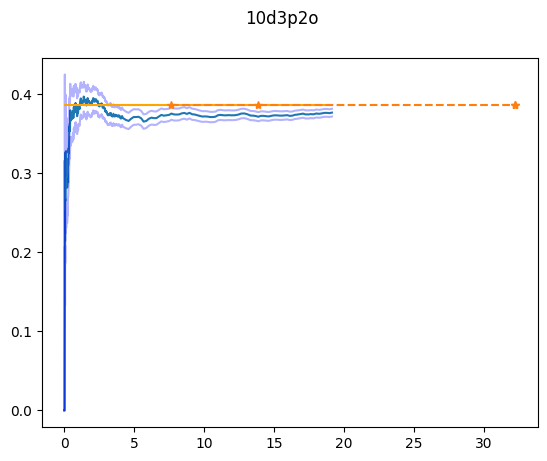

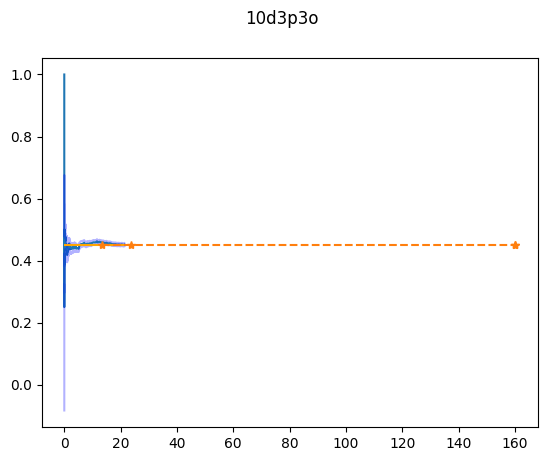

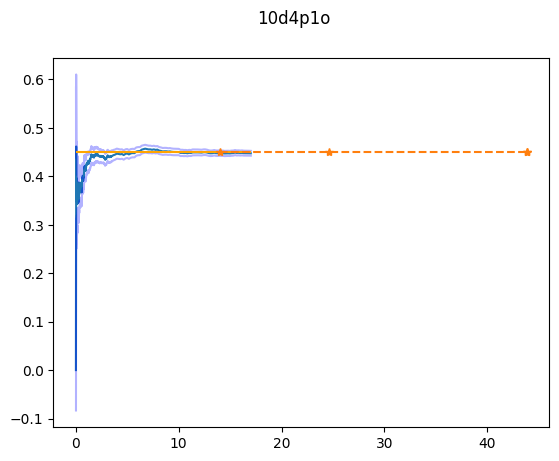

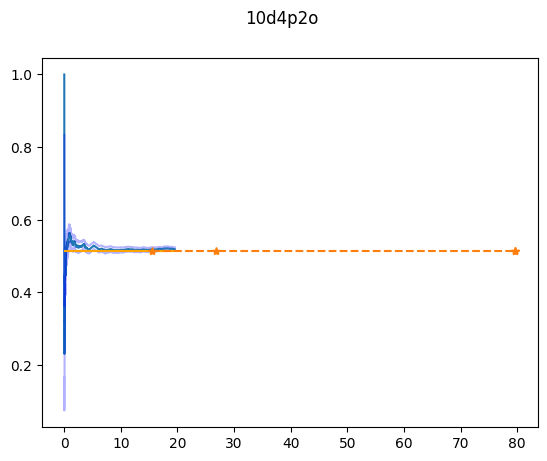

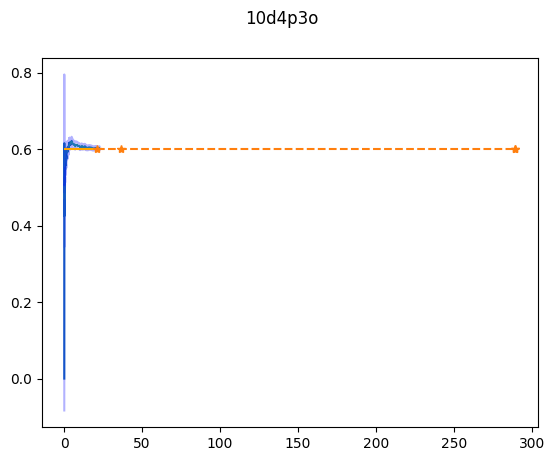

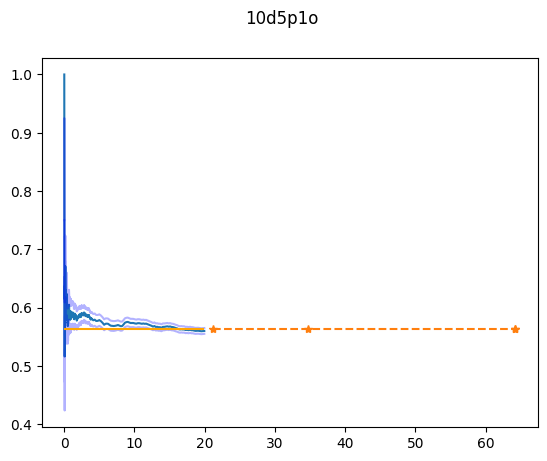

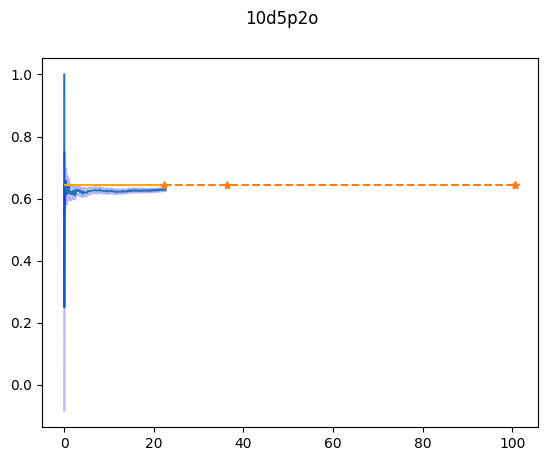

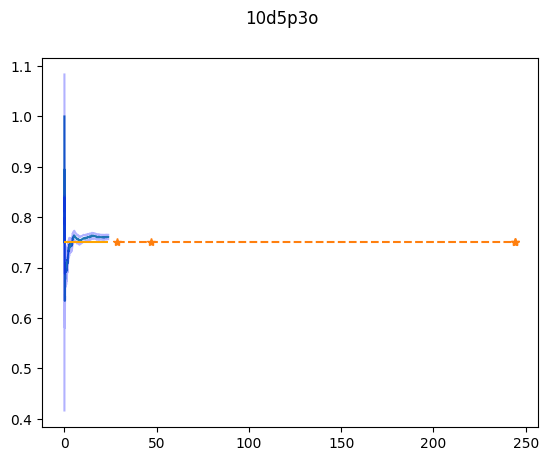

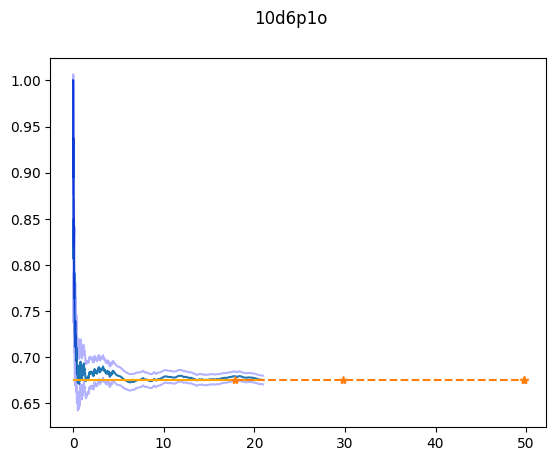

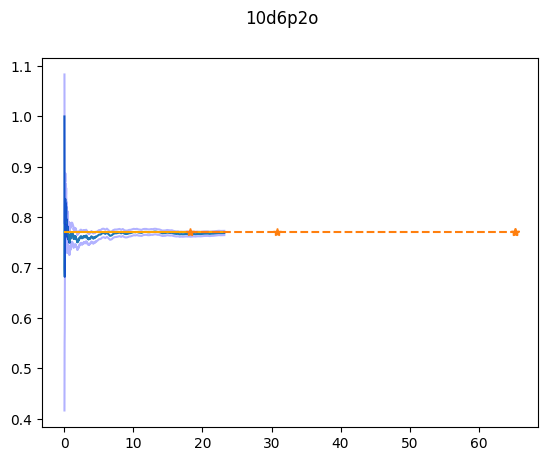

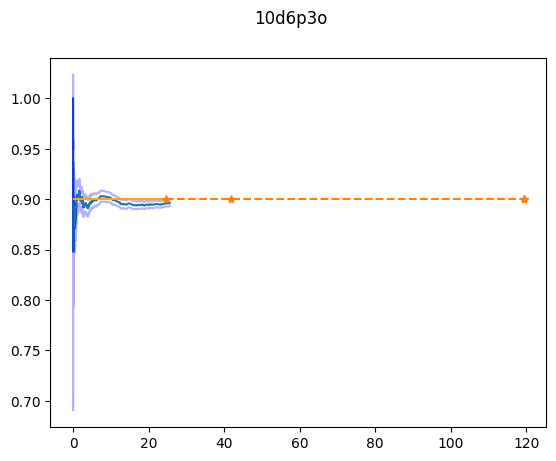

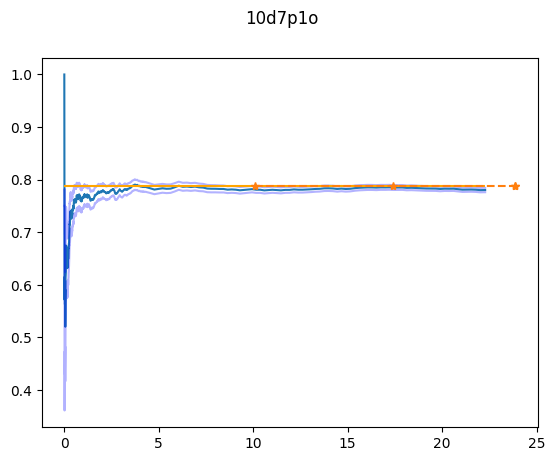

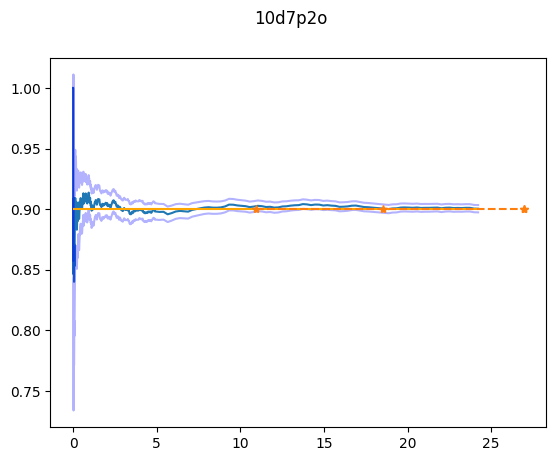

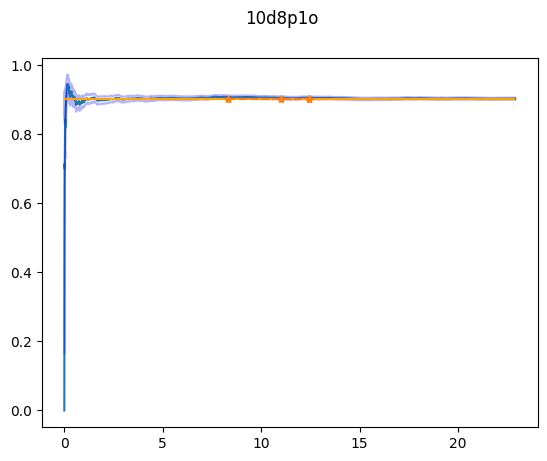

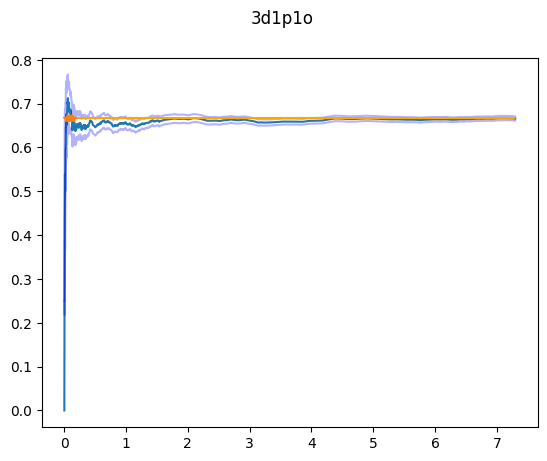

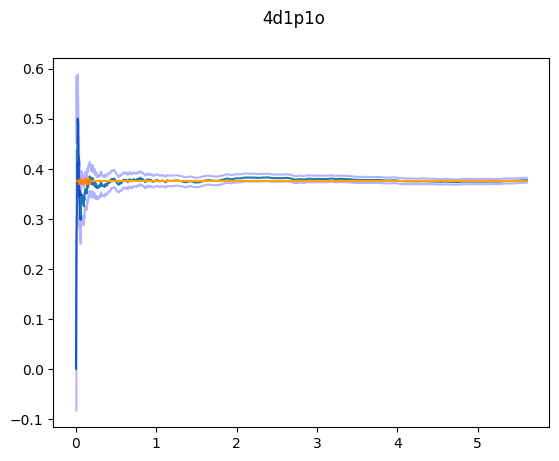

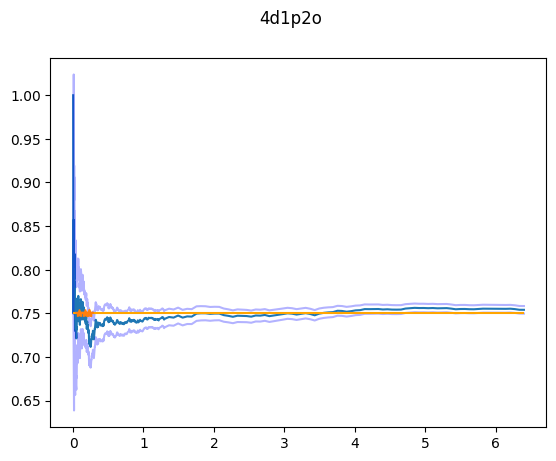

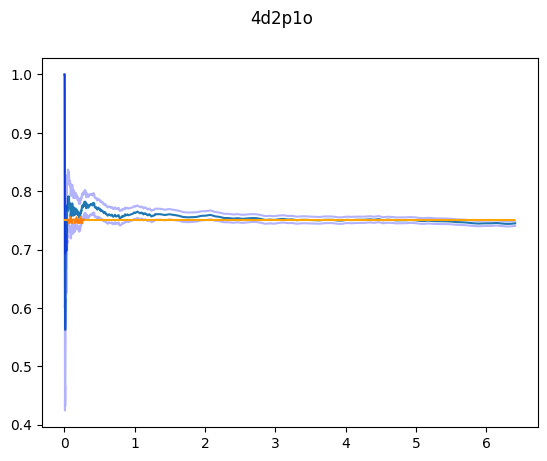

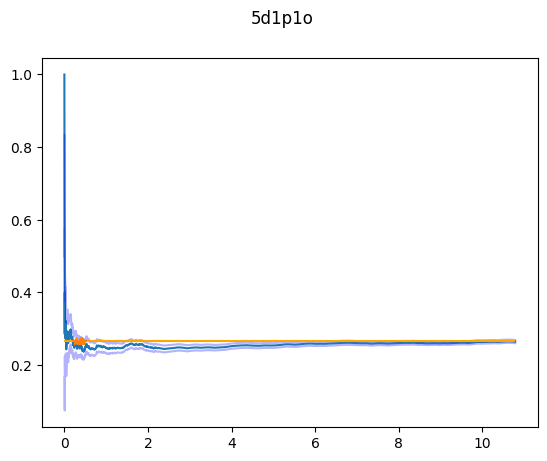

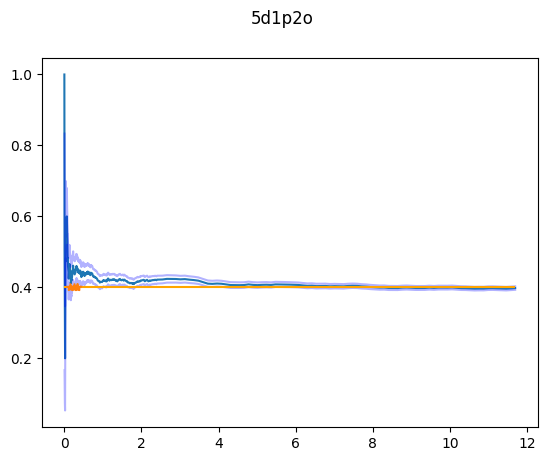

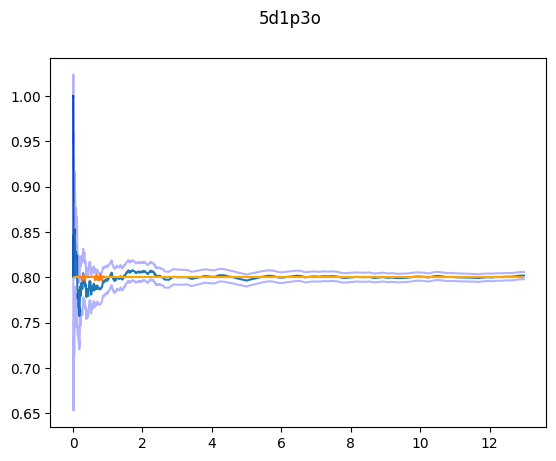

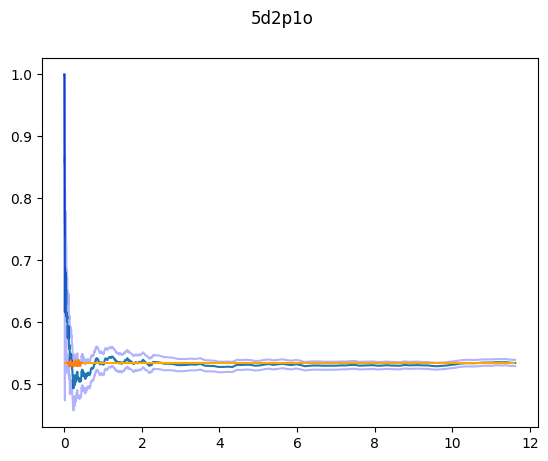

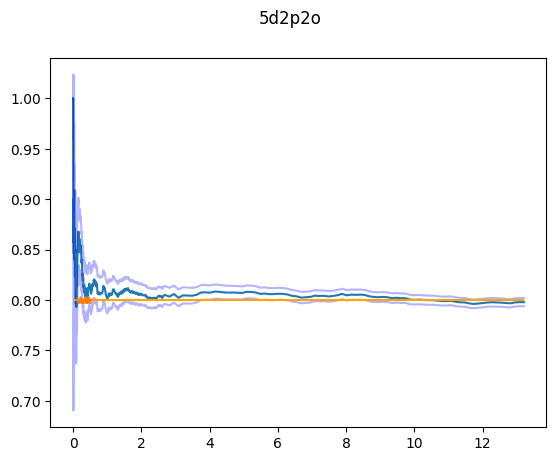

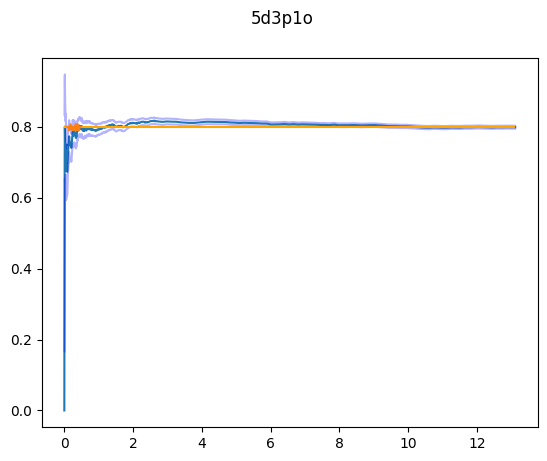

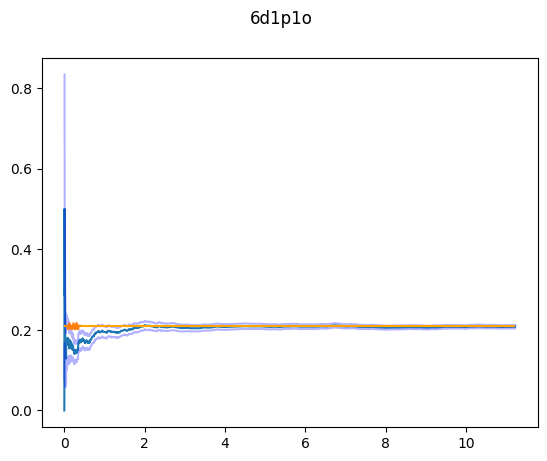

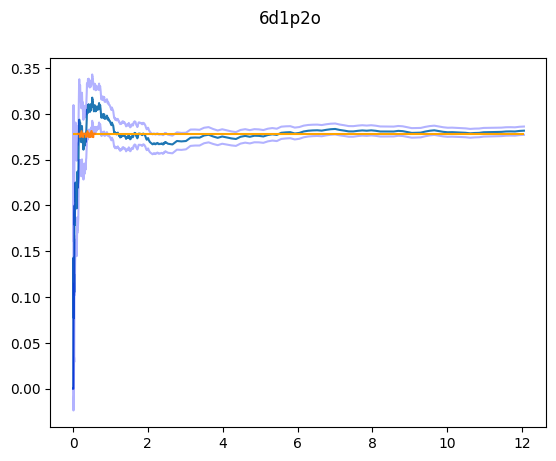

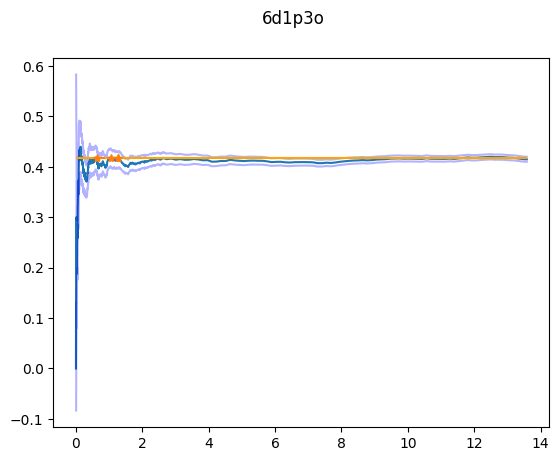

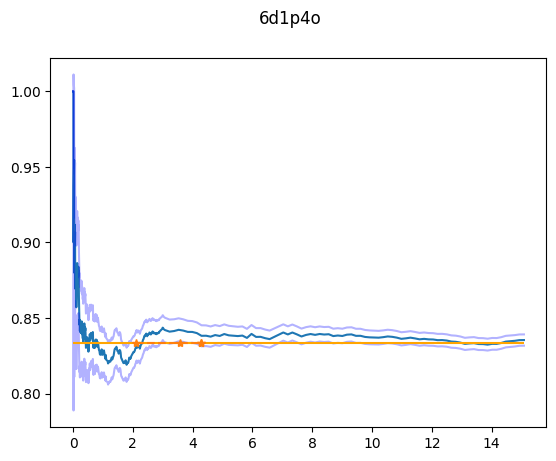

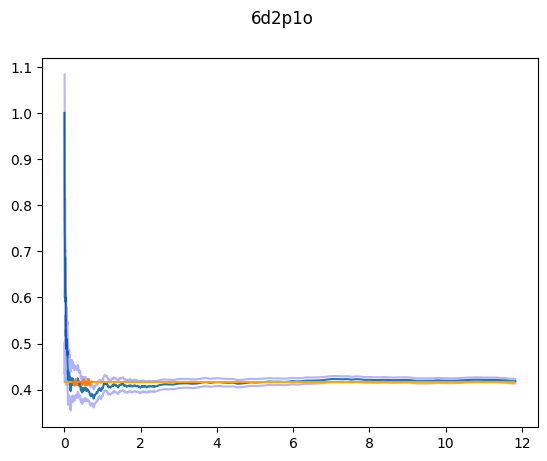

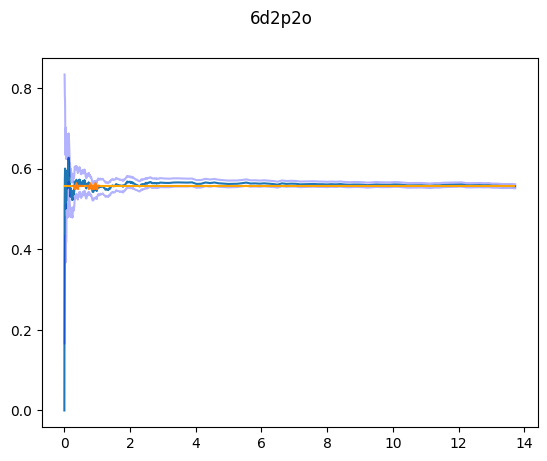

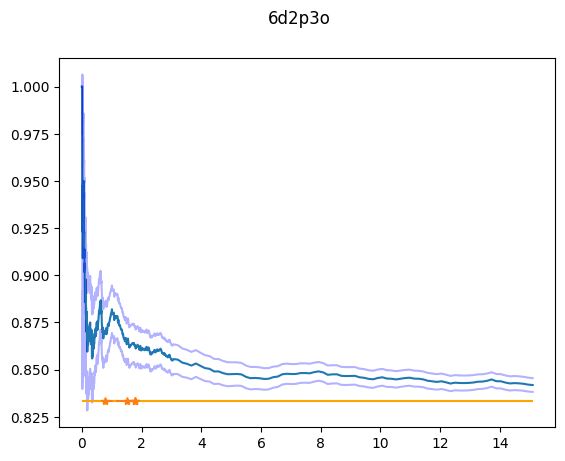

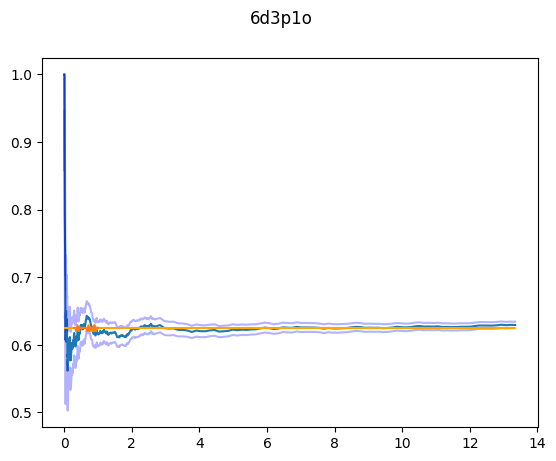

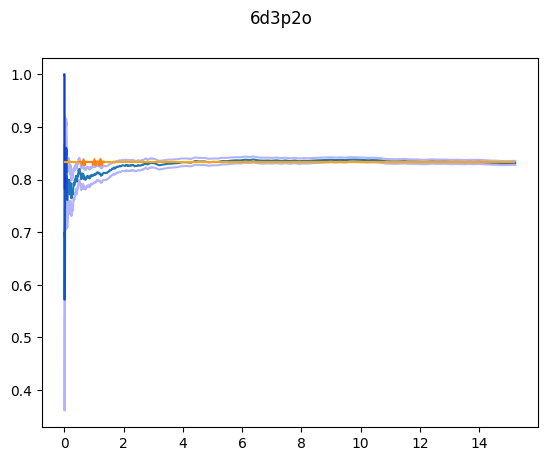

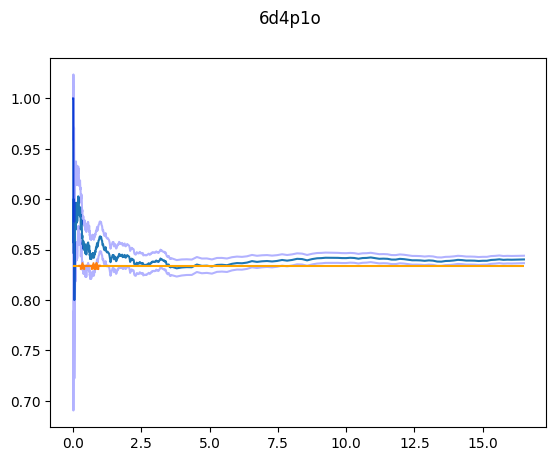

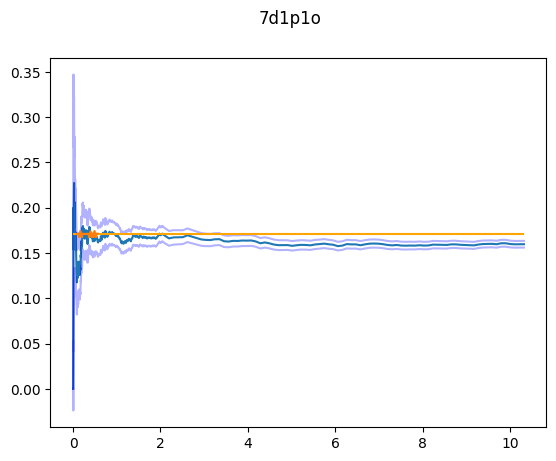

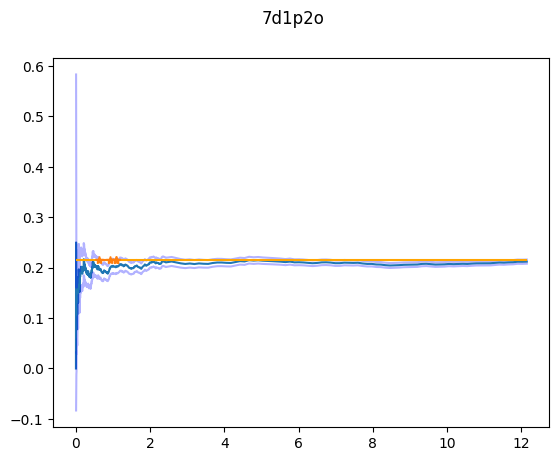

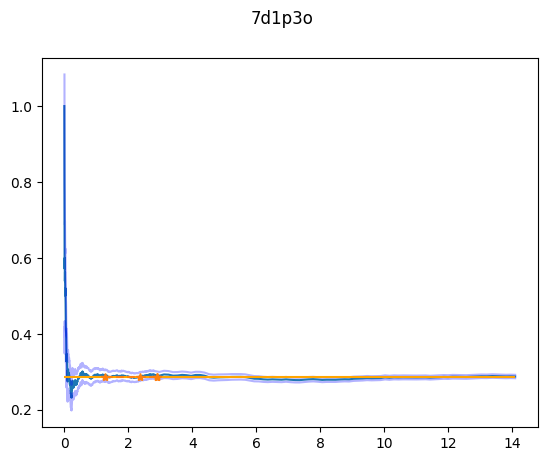

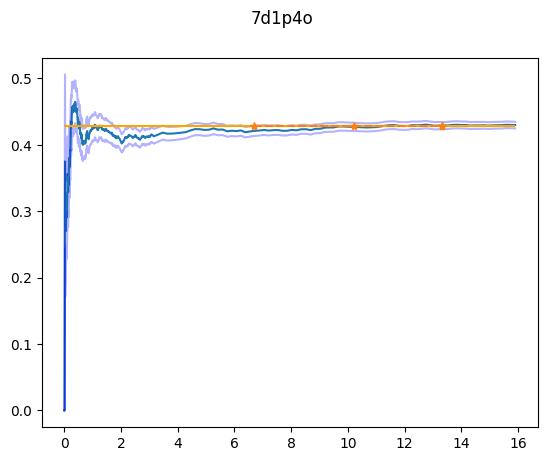

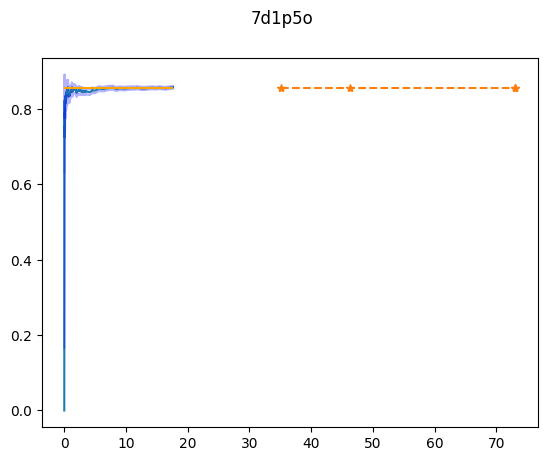

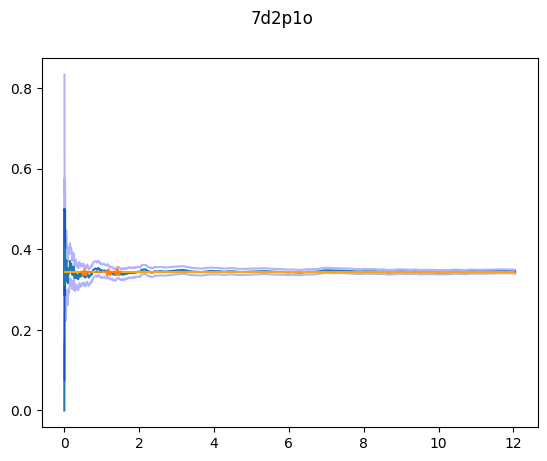

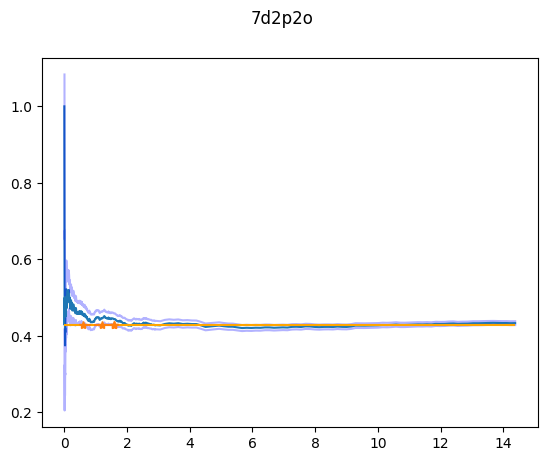

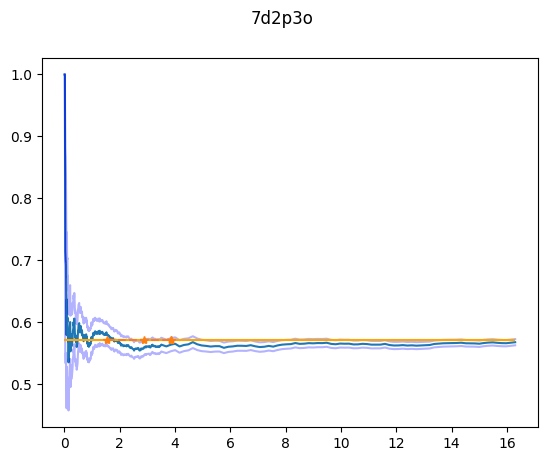

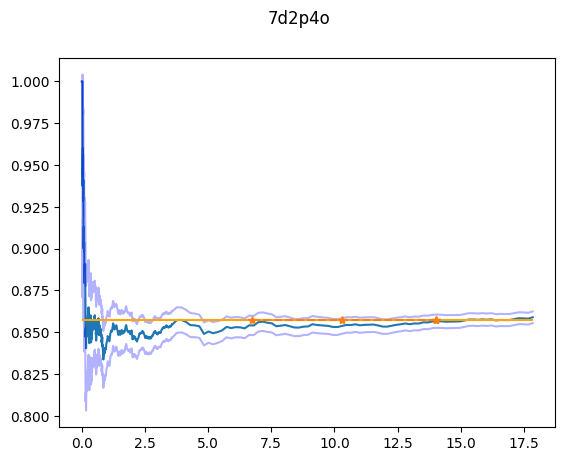

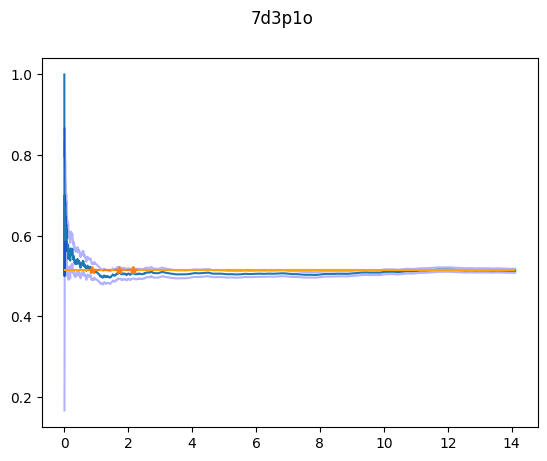

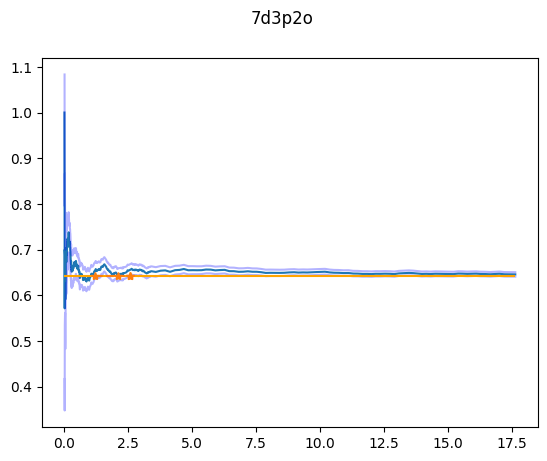

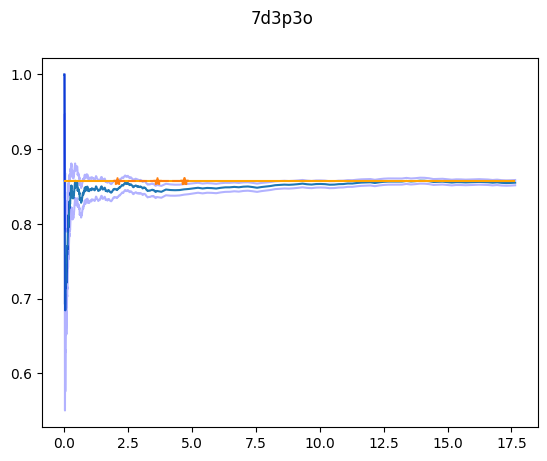

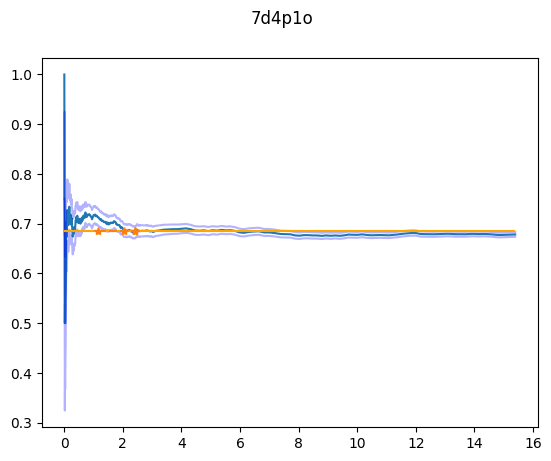

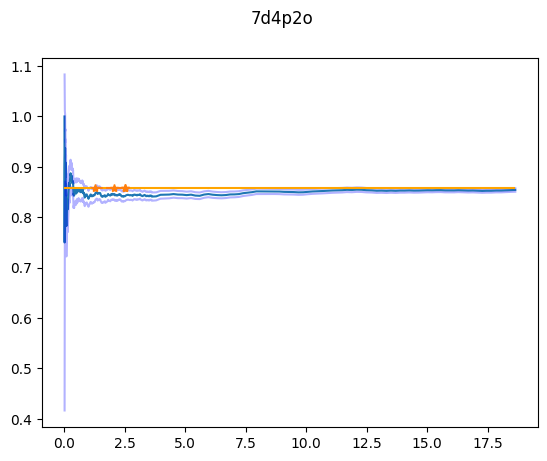

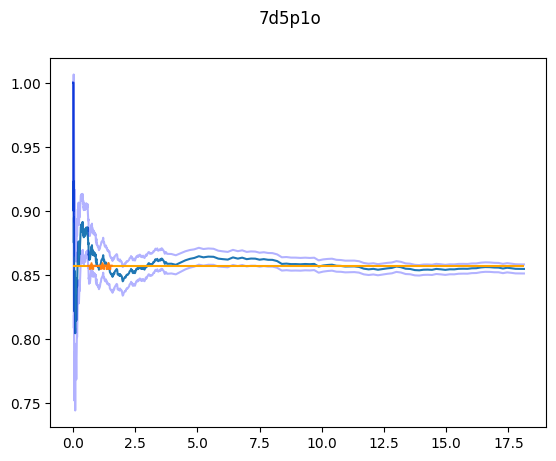

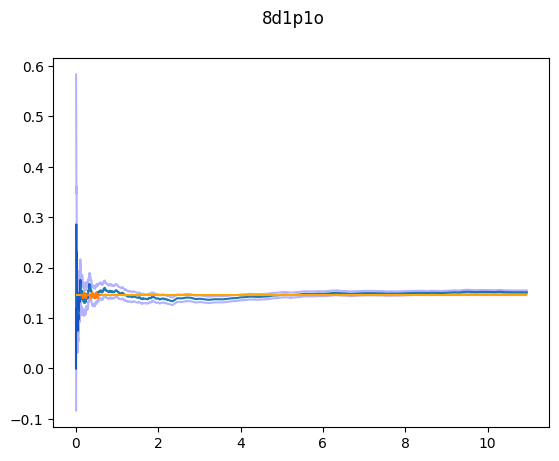

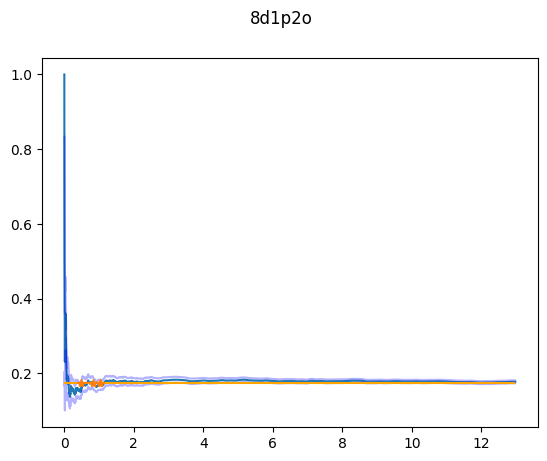

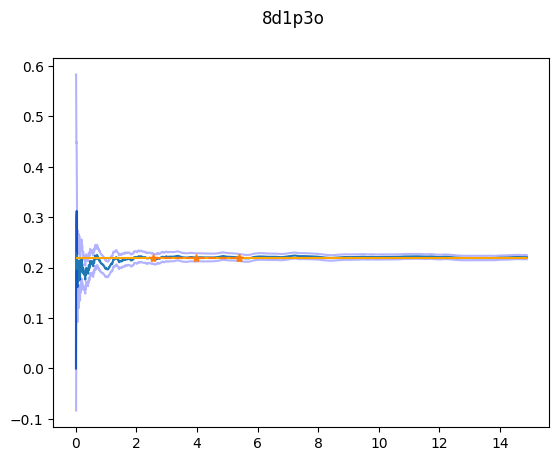

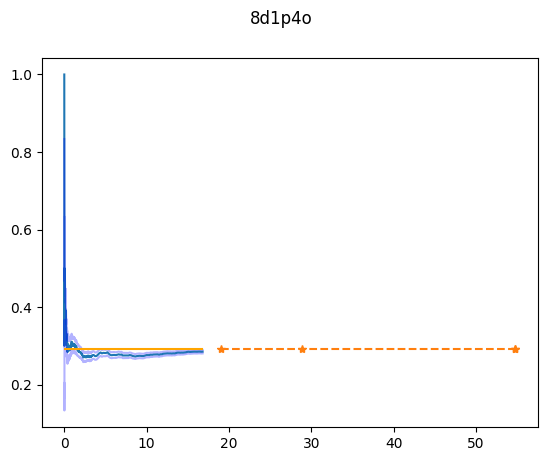

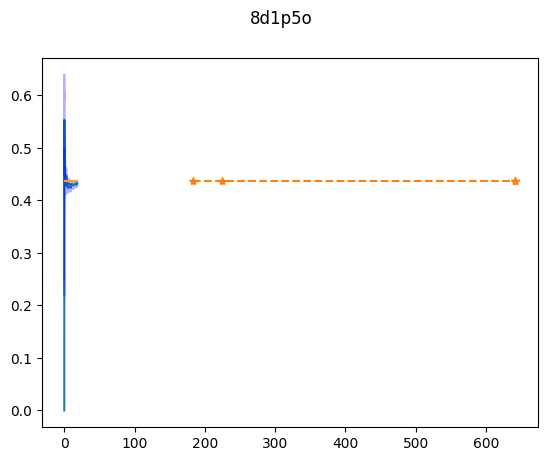

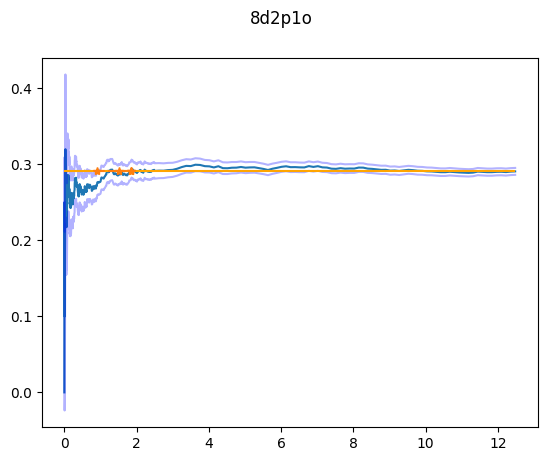

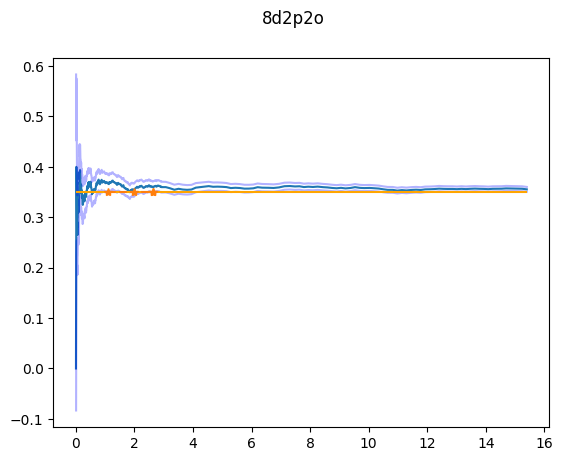

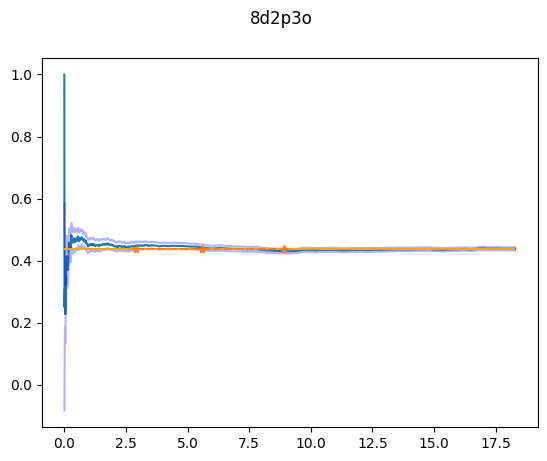

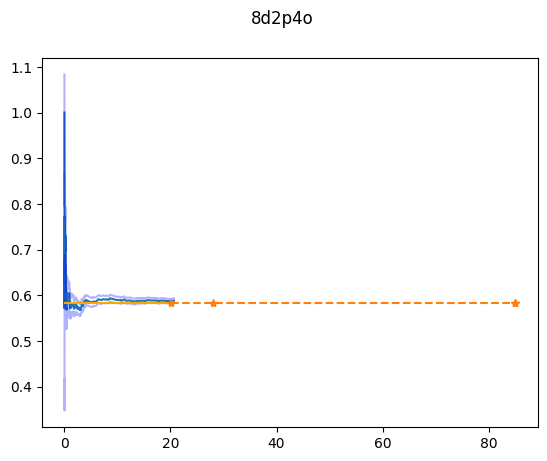

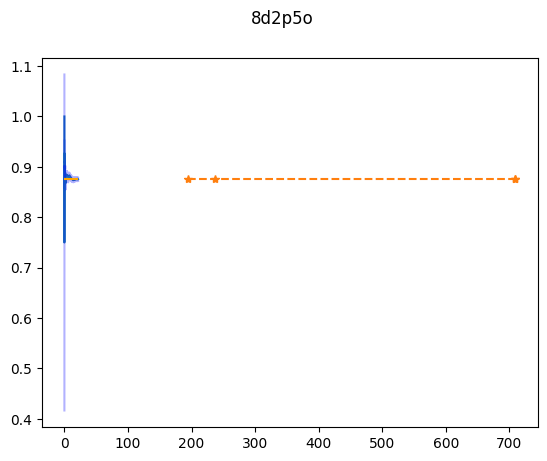

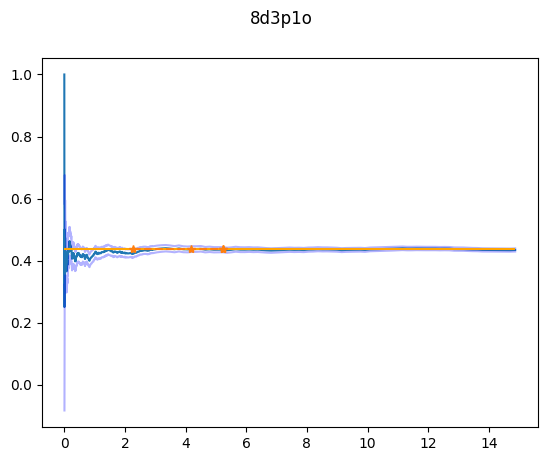

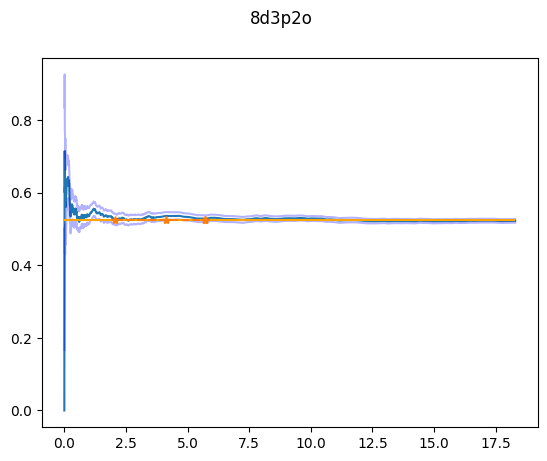

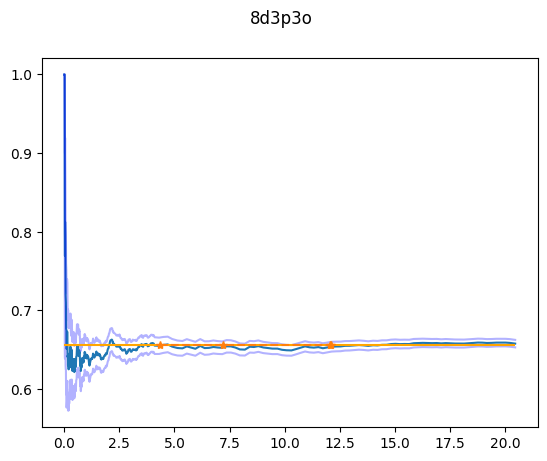

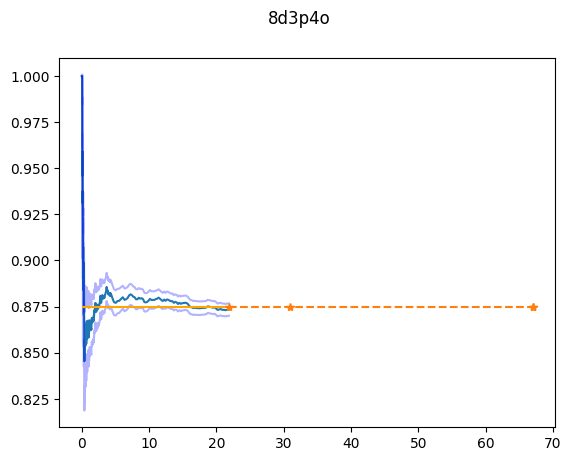

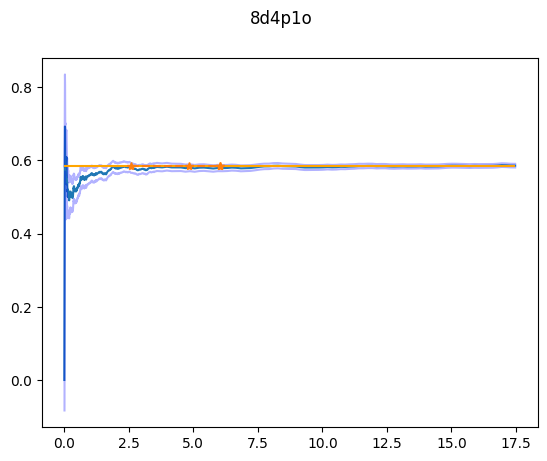

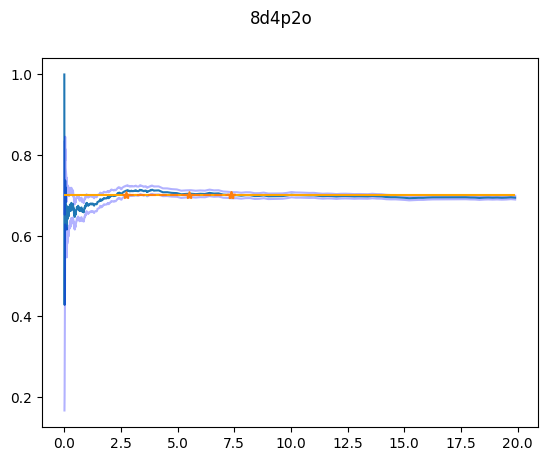

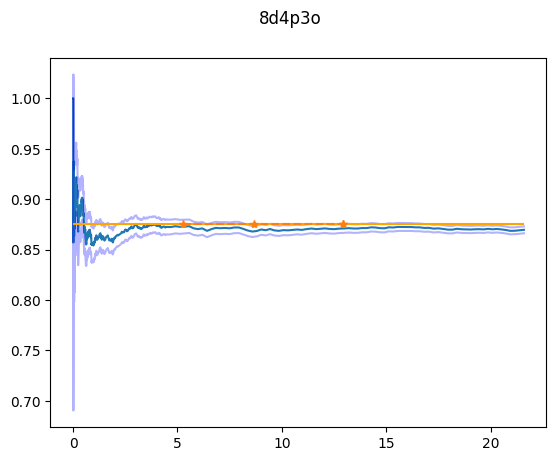

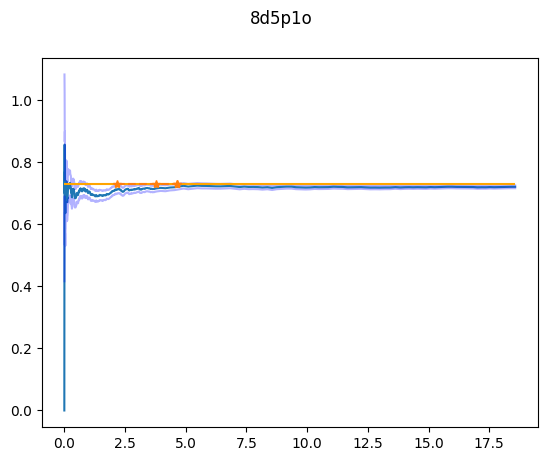

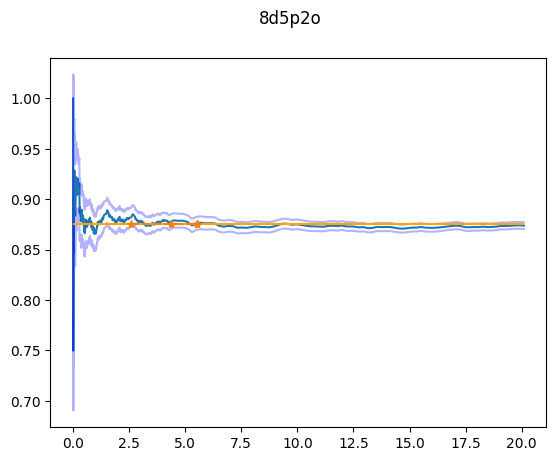

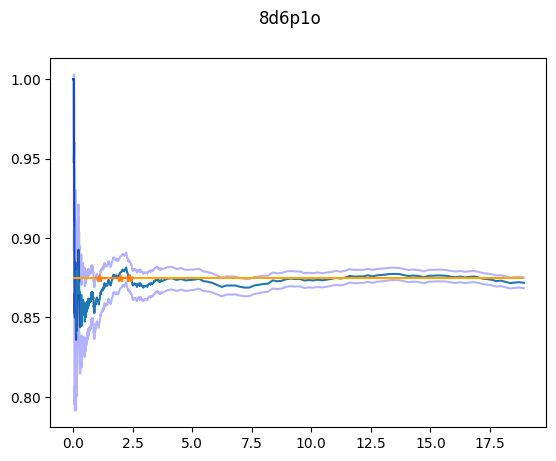

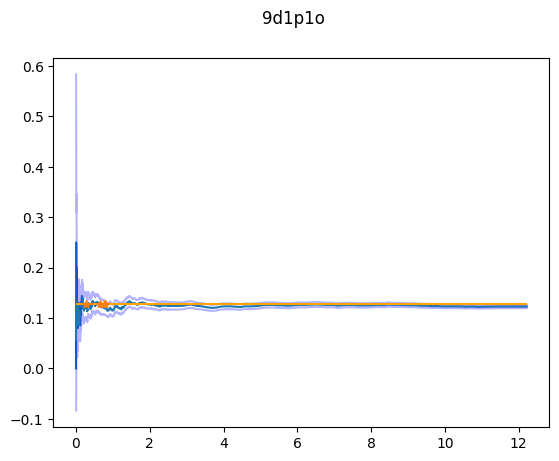

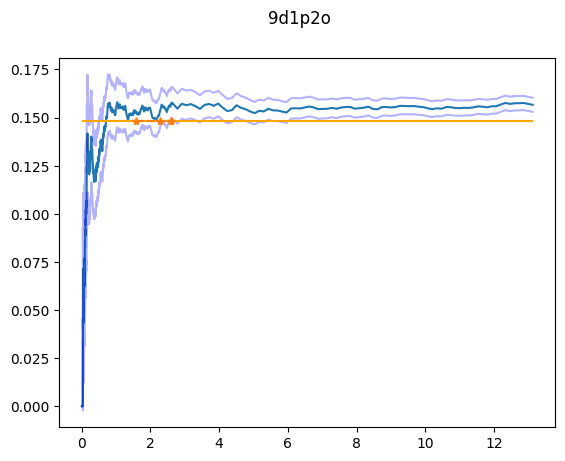

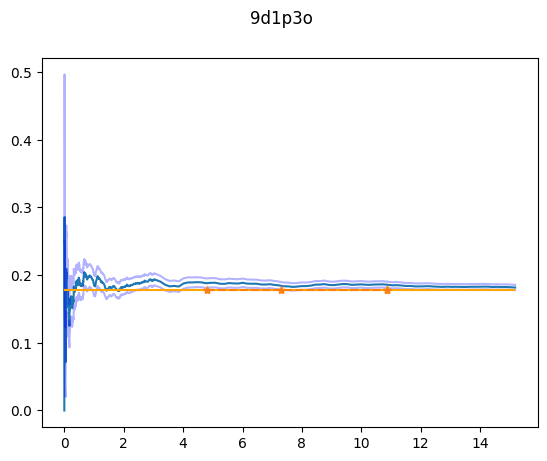

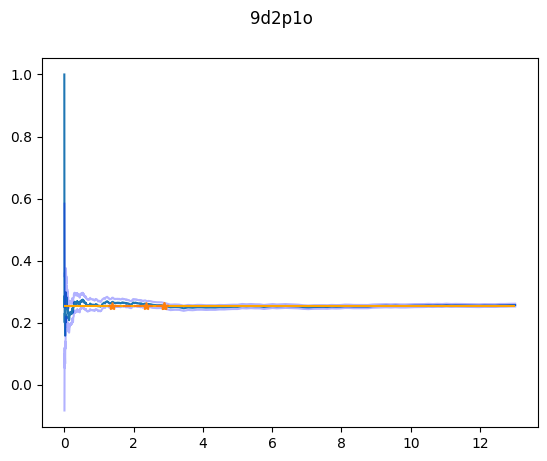

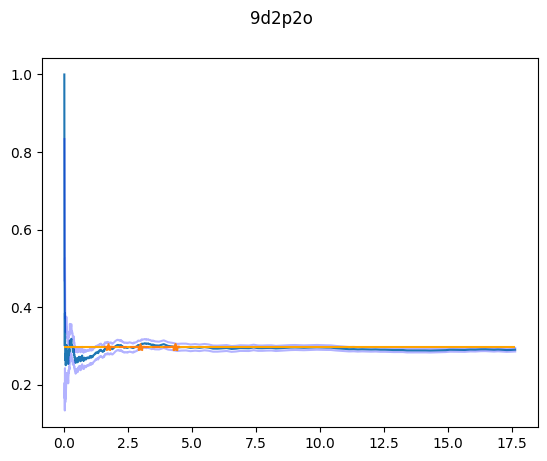

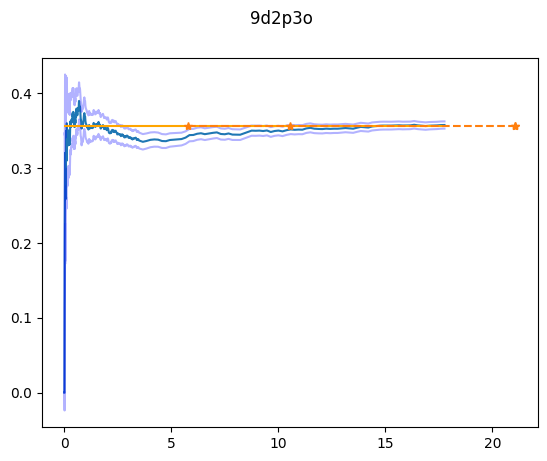

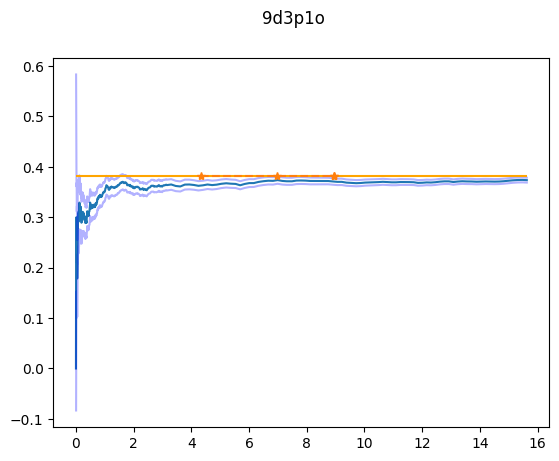

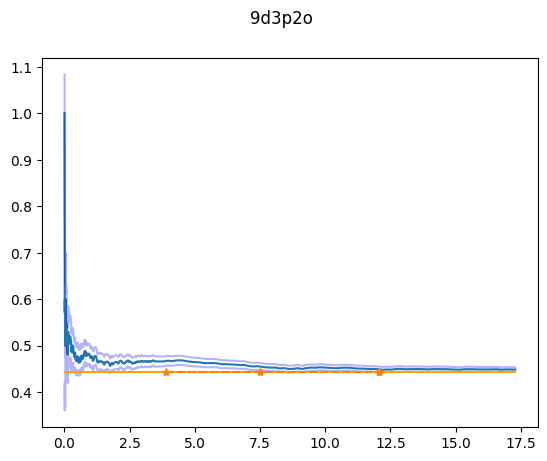

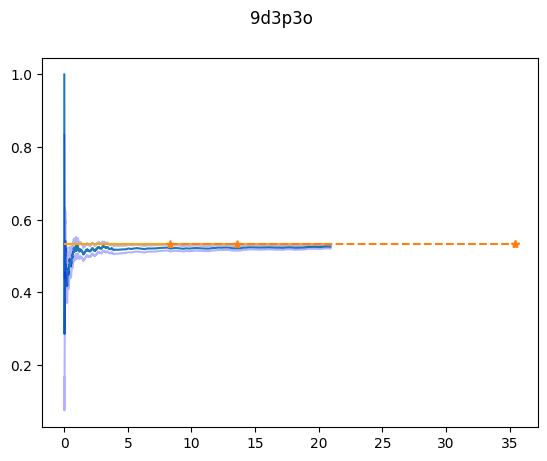

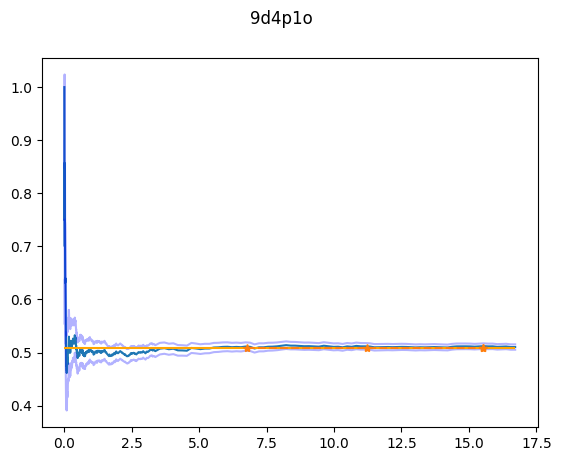

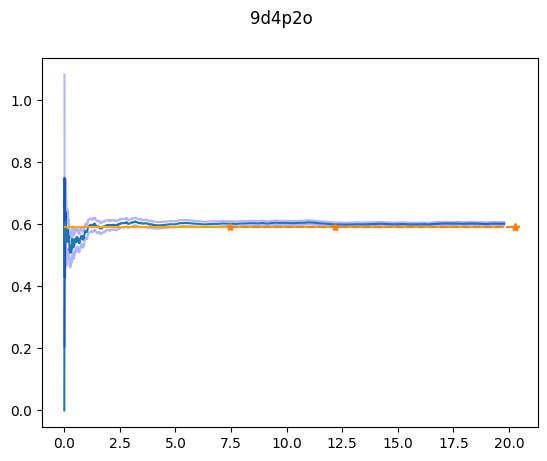

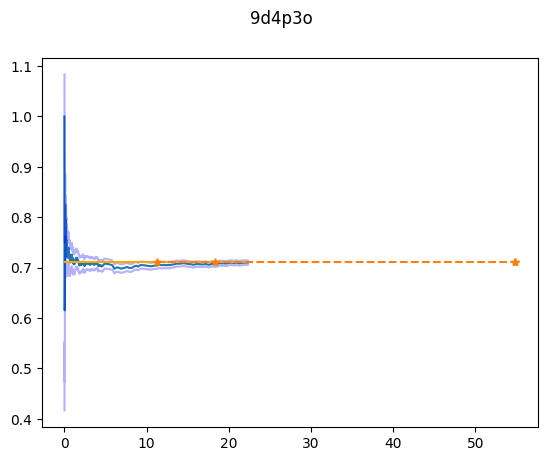

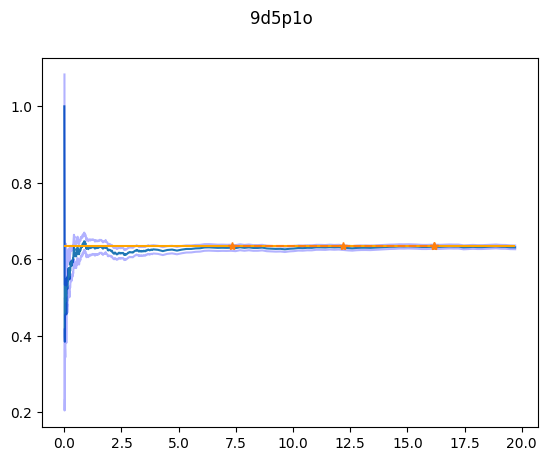

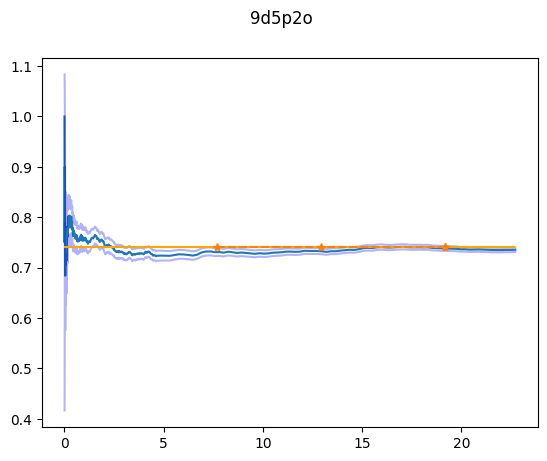

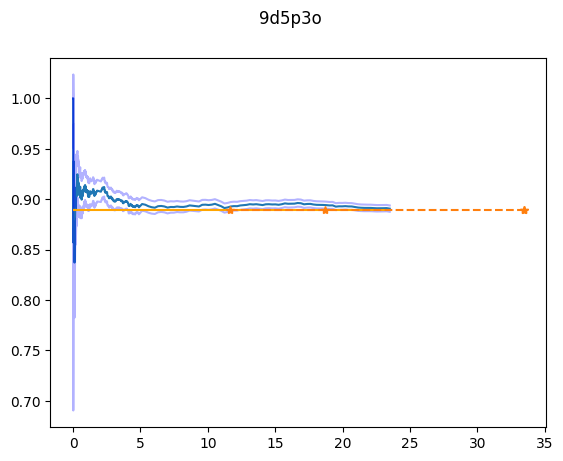

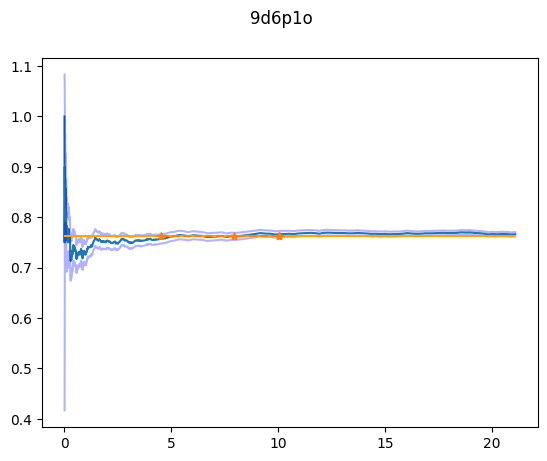

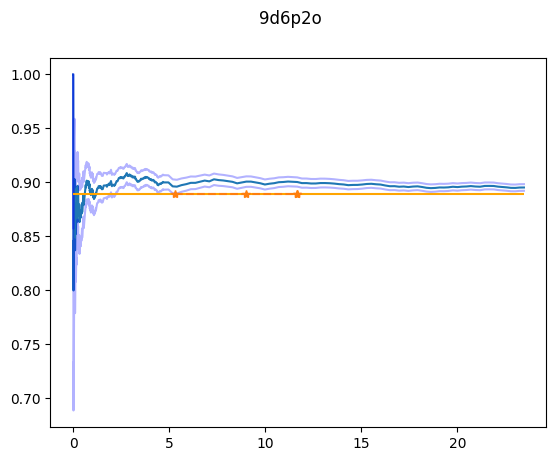

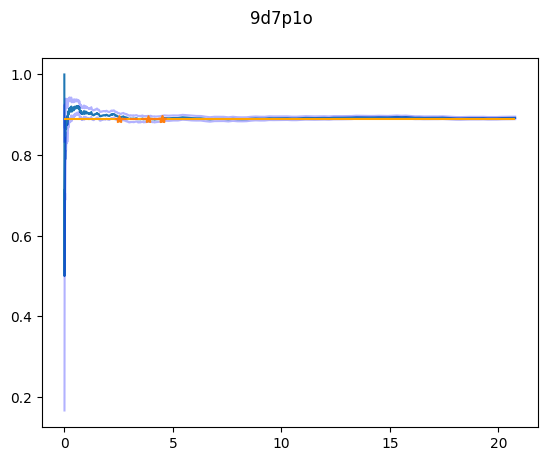

In [40]:
for size in avail_experiments:
  sample = pd.read_csv(f'eval_data/short_{size}.csv')
  model = pd.read_csv(f'eval_data/times_{size}.csv')

  plt.plot(sample.iloc[:,2], sample['mean'],)
  plt.plot(sample.iloc[:,2], sample.iloc[:,3], 'b', alpha=0.3)
  plt.plot(sample.iloc[:,2], sample.iloc[:,4], 'b', alpha=0.3)
  plt.hlines(model.iloc[0,1], xmin=0, xmax=sample.iloc[-1,2], color='orange')
  plt.plot(model.iloc[:,0], model.iloc[:,1], '*--')
  plt.suptitle(str(size))
  plt.show()

In [48]:
times = pd.read_csv('construction_overview.csv', index_col=False)
times

,d,p,o,gen_time
0,5,1,1,0.284185
1,5,1,2,0.138053
2,5,1,3,0.286446
3,5,2,1,0.147544
4,5,2,2,0.197419
...,...,...,...,...
105,10,6,2,18.234352
106,10,6,3,24.701641
107,10,7,1,10.118301
108,10,7,2,10.949906


In [50]:
d_10 = times[times['d'] == 10].iloc[:,1:]

In [51]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})

In [53]:
new_arr = np.zeros((10, 10))
for line in d_10.iterrows():
  l = line[1]
  new_arr[int(l[0])-1, int(l[1])-1] = l[2]
times = np.round(new_arr, decimals=4)
times[times == 0] = np.nan
times = times[:-2, :-4]
df = pd.DataFrame(times)
df.columns = range(1, 7)
df.index = range(1,9)
df.to_csv('10_doors_gen_time.csv')

In [54]:
df

,1,2,3,4,5,6
1,0.6300,1.1256,9.4440,114.7265,4120.6550,NaN
2,2.2299,4.0968,8.7910,112.0942,3798.0694,NaN
3,6.5890,7.6224,13.2294,122.1427,4376.5562,NaN
4,13.9850,15.5453,21.0001,123.3044,3874.2845,NaN
5,21.1916,22.2102,28.6171,135.5677,NaN,NaN
6,17.8252,18.2344,24.7016,NaN,NaN,NaN
7,10.1183,10.9499,NaN,NaN,NaN,NaN
8,8.3117,NaN,NaN,NaN,NaN,NaN
